# CAR EVALUATION  MODEL

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #For EDA purpose
%matplotlib inline   
import seaborn as sns  #EDA purpose
import warnings  #bypass Warning
warnings.filterwarnings('ignore')

from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

## Load Dataset

In [3]:
df = pd.read_csv('car.csv')
df.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,med,unacc
1,1,vhigh,vhigh,2,2,small,high,unacc
2,2,vhigh,vhigh,2,2,med,low,unacc
3,3,vhigh,vhigh,2,2,med,med,unacc
4,4,vhigh,vhigh,2,2,med,high,unacc


## Basic statatics of Data

In [4]:
df.shape

# WE HAVE TOTAL 1727 CAR'S DATA AND 8 VARIABLES FOR IT

(1727, 8)

In [5]:
df.isnull().sum()

# THERE IS NO NULL VALUES IN DATASET

Unnamed: 0    0
buying        0
maint         0
doors         0
persons       0
lug_boot      0
safety        0
class         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1727 non-null   int64 
 1   buying      1727 non-null   object
 2   maint       1727 non-null   object
 3   doors       1727 non-null   object
 4   persons     1727 non-null   object
 5   lug_boot    1727 non-null   object
 6   safety      1727 non-null   object
 7   class       1727 non-null   object
dtypes: int64(1), object(7)
memory usage: 108.1+ KB


In [7]:
print("unique value in buying is ", df['buying'].nunique())
print("unique value in maint is ", df['maint'].nunique())
print("unique value in doors is ", df['doors'].nunique())
print("unique value in persons is ", df['persons'].nunique())
print("unique value in lug_boot is ", df['lug_boot'].nunique())
print("unique value in safety is ", df['safety'].nunique())
print("unique value in class is ", df['class'].nunique())

unique value in buying is  4
unique value in maint is  4
unique value in doors is  4
unique value in persons is  3
unique value in lug_boot is  3
unique value in safety is  3
unique value in class is  4


In [8]:
df.head()

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,vhigh,vhigh,2,2,small,med,unacc
1,1,vhigh,vhigh,2,2,small,high,unacc
2,2,vhigh,vhigh,2,2,med,low,unacc
3,3,vhigh,vhigh,2,2,med,med,unacc
4,4,vhigh,vhigh,2,2,med,high,unacc


In [9]:
print('buying',df['buying'].unique())
print('maint',df['maint'].unique())
print('lug_boot',df['lug_boot'].unique())
print('safety',df['safety'].unique())
print('class',df['class'].unique())

buying ['vhigh' 'high' 'med' 'low']
maint ['vhigh' 'high' 'med' 'low']
lug_boot ['small' 'med' 'big']
safety ['med' 'high' 'low']
class ['unacc' 'acc' 'vgood' 'good']


In [10]:
myord = {'vhigh' : 3,
         'high' : 2,
         'med' : 1,
         'low' : 0
}

df['buying'] = df.buying.map(myord)
df['maint'] = df.maint.map(myord)
df['safety'] = df.safety.map(myord)

myord1 = {'big' : 2,
         'med' : 1,
         'small' : 0
}
df['lug_boot'] = df.lug_boot.map(myord1)

# HERE, WE CONVERT OBJECTIVE CATAGORY INTO 0,1,2,3 FORM

In [11]:
df

,Unnamed: 0,buying,maint,doors,persons,lug_boot,safety,class
0,0,3,3,2,2,0,1,unacc
1,1,3,3,2,2,0,2,unacc
2,2,3,3,2,2,1,0,unacc
3,3,3,3,2,2,1,1,unacc
4,4,3,3,2,2,1,2,unacc
...,...,...,...,...,...,...,...,...
1722,1722,0,0,5more,more,1,1,good
1723,1723,0,0,5more,more,1,2,vgood
1724,1724,0,0,5more,more,2,0,unacc
1725,1725,0,0,5more,more,2,1,good


In [12]:
df["doors"].replace({"5more": 5}, inplace=True)
df["persons"].replace({"more": 6}, inplace=True)

In [13]:
df = df.drop(['Unnamed: 0'], axis = 1)

# DROP UNNECESSERY COLUMN

In [14]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,1,unacc
1,3,3,2,2,0,2,unacc
2,3,3,2,2,1,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc
...,...,...,...,...,...,...,...
1722,0,0,5,6,1,1,good
1723,0,0,5,6,1,2,vgood
1724,0,0,5,6,2,0,unacc
1725,0,0,5,6,2,1,good


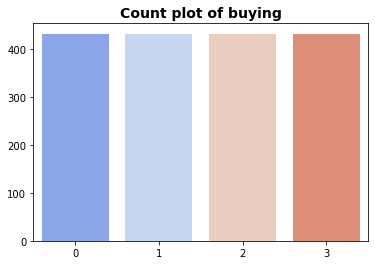

In [15]:
fig = sns.barplot(df['buying'].value_counts().index,df['buying'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of buying', fontsize=14, fontweight='bold')
plt.show()

CONCLUSION:
    BUYING COLUMN HAVE SAME COUNTATION WITH EACH UNIQUE VALUES

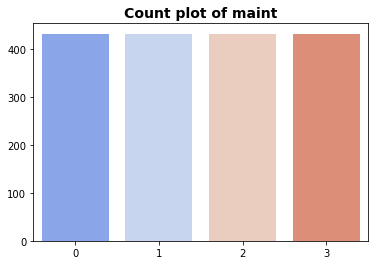

In [16]:
fig = sns.barplot(df['maint'].value_counts().index,df['maint'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of maint', fontsize=14, fontweight='bold')
plt.show()

CONCLUSION:
    maint COLUMN HAVE SAME COUNTATION WITH EACH UNIQUE VALUES

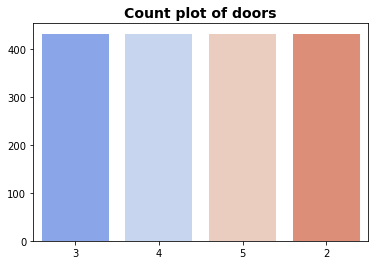

In [17]:
fig = sns.barplot(df['doors'].value_counts().index,df['doors'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of doors', fontsize=14, fontweight='bold')
plt.show()

CONCLUSION:
    doors COLUMN HAVE SAME COUNTATION WITH EACH UNIQUE VALUES

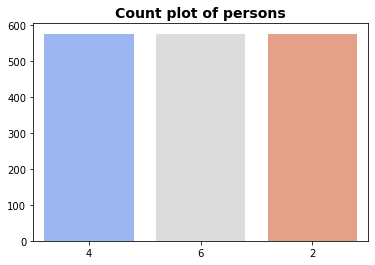

In [18]:
fig = sns.barplot(df['persons'].value_counts().index,df['persons'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of persons', fontsize=14, fontweight='bold')
plt.show()

CONCLUSION:
    persons COLUMN HAVE SAME COUNTATION WITH EACH UNIQUE VALUES

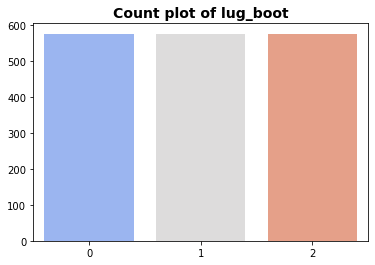

In [19]:
fig = sns.barplot(df['lug_boot'].value_counts().index,df['lug_boot'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of lug_boot', fontsize=14, fontweight='bold')
plt.show()

CONCLUSION:
    lug_boot COLUMN HAVE SAME COUNTATION WITH EACH UNIQUE VALUES

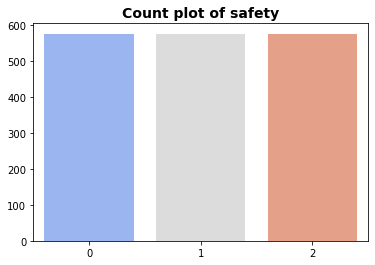

In [20]:
fig = sns.barplot(df['safety'].value_counts().index,df['safety'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of safety', fontsize=14, fontweight='bold')
plt.show()

CONCLUSION:
    safety COLUMN HAVE SAME COUNTATION WITH EACH UNIQUE VALUES

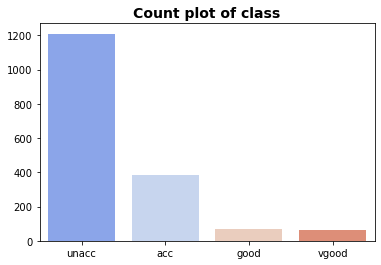

In [21]:
fig = sns.barplot(df['class'].value_counts().index,df['class'].value_counts().values, palette='coolwarm')
fig.set_title('Count plot of class', fontsize=14, fontweight='bold')
plt.show()

CONCLUSION:
    
    we have higher no of 'unacc' in dataset than 'acc' and then good and vgood

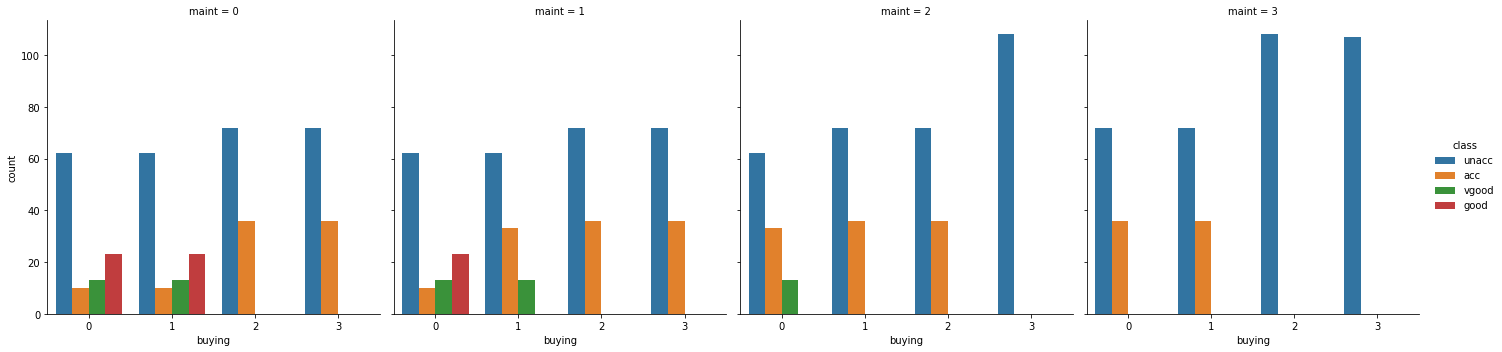

In [22]:
sns.catplot(x ='buying', hue ='class',
kind ='count', col ='maint', data = df)

conclusion:
    
    where maintance=0 then
        good and vgood class cars also presented in 0 and 1.
        
    where maintance=1 then
        good and vgood class cars presented only in 0 and higher no of cars are unacc
        
    where maintance=2 then
        unacc class cars are highr and no good and vgood class cars are there.
        
    were maintance= 3 then
    mostly cars are unacc, means we can say that as maintanance is high than class of cars going to low.

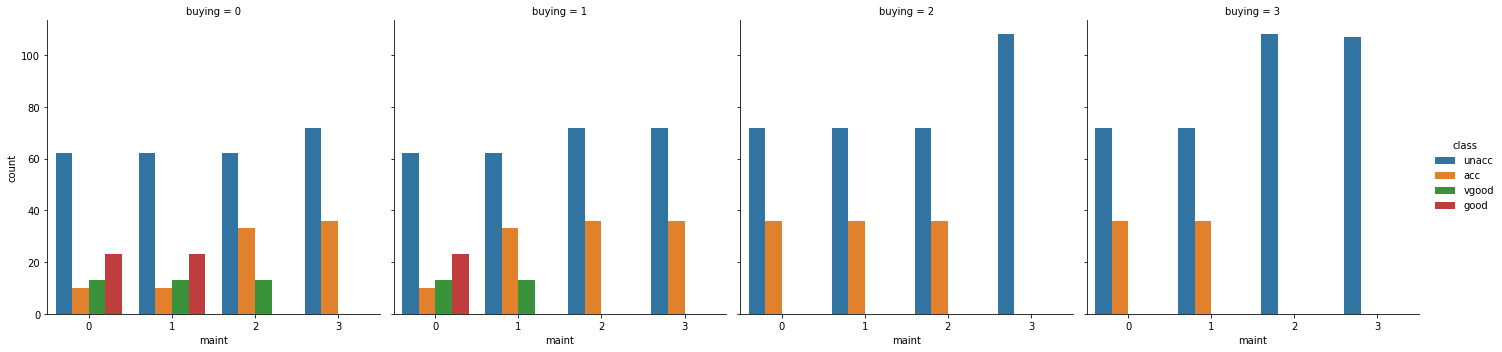

In [23]:
sns.catplot(x ='maint', hue ='class',
kind ='count', col ='buying', data = df)

conclusion:
    
    on common base, we can say that low maintanance cars have higher buying 

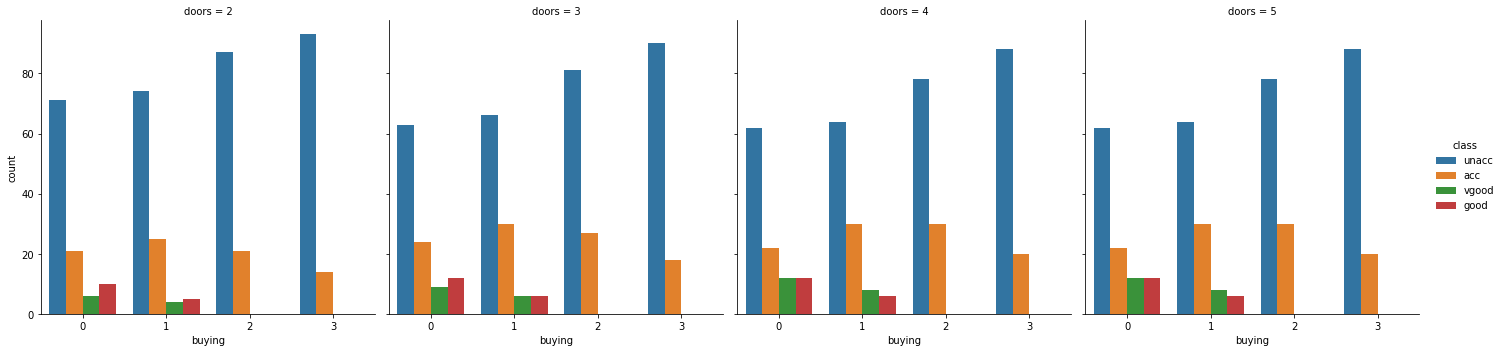

In [24]:
sns.catplot(x ='buying', hue ='class',
kind ='count', col ='doors', data = df)

conclusion:
    
    in all cases we can visulise that there is no effect of no of doors on buying

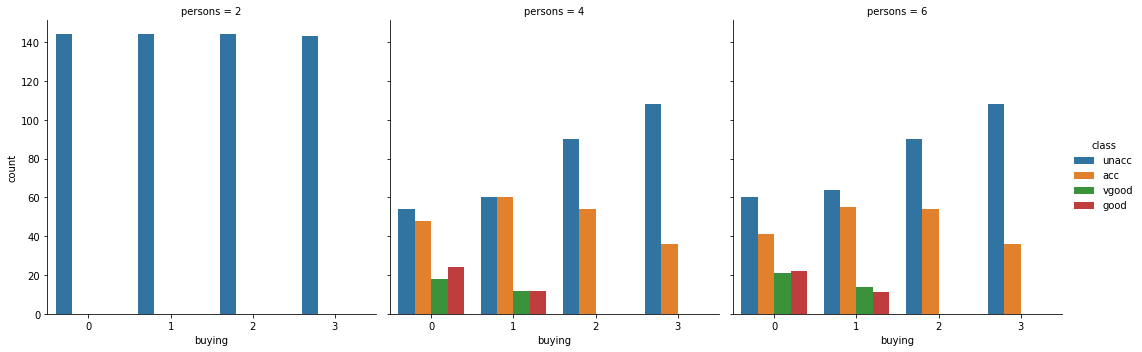

In [25]:
sns.catplot(x ='buying', hue ='class',
kind ='count', col ='persons', data = df)

conclusion:
    
    2 sheeter car have no good or vgood class cars.
    4 and 6 sheeter car have good and vgood class cars

In [26]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class'], dtype='object')

In [27]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,1,unacc
1,3,3,2,2,0,2,unacc
2,3,3,2,2,1,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc
...,...,...,...,...,...,...,...
1722,0,0,5,6,1,1,good
1723,0,0,5,6,1,2,vgood
1724,0,0,5,6,2,0,unacc
1725,0,0,5,6,2,1,good


In [28]:
from sklearn.preprocessing import LabelEncoder

lb= LabelEncoder()
df['class'] = lb.fit_transform(df['class'])

#convert objective to int form

In [29]:
df

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,2,2,0,1,2
1,3,3,2,2,0,2,2
2,3,3,2,2,1,0,2
3,3,3,2,2,1,1,2
4,3,3,2,2,1,2,2
...,...,...,...,...,...,...,...
1722,0,0,5,6,1,1,1
1723,0,0,5,6,1,2,3
1724,0,0,5,6,2,0,2
1725,0,0,5,6,2,1,1


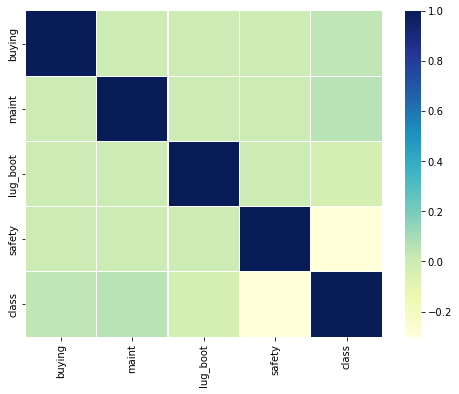

In [30]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),vmax=1,linewidth=0.1,cmap='YlGnBu')
plt.xticks(rotation=90)
plt.show()

In [31]:
df.corr()

,buying,maint,lug_boot,safety,class
buying,1.000000,-0.001043,0.000952,0.000952,0.039230
maint,-0.001043,1.000000,0.000952,0.000952,0.061704
lug_boot,0.000952,0.000952,1.000000,-0.000869,-0.032839
safety,0.000952,0.000952,-0.000869,1.000000,-0.301688
class,0.039230,0.061704,-0.032839,-0.301688,1.000000


conclusion:
    class have co-relation with buying and maintanance.
    

In [40]:
df['doors'] = df.doors.astype(int)
df['persons'] = df.persons.astype(int)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   buying    1727 non-null   int64
 1   maint     1727 non-null   int64
 2   doors     1727 non-null   int32
 3   persons   1727 non-null   int32
 4   lug_boot  1727 non-null   int64
 5   safety    1727 non-null   int64
 6   class     1727 non-null   int32
dtypes: int32(3), int64(4)
memory usage: 74.3 KB


OUTLIER REMOVEL

In [43]:
from scipy.stats import zscore

#di=df.columns
z_score=zscore(df)
print(df.shape)
df_1=df.loc[(z_score<3).all(axis=1)]
print(df_1.shape)

(1727, 7)
(1727, 7)


In [44]:
df_1.skew()


buying      0.000933
maint       0.000933
doors      -0.000933
persons    -0.001065
lug_boot   -0.001065
safety     -0.001065
class      -0.987511
dtype: float64

In [45]:
x =df_1.drop('class',axis=1)
y =df_1['class']

In [47]:
from sklearn.preprocessing import StandardScaler # To fit all data on same scale
from sklearn.model_selection import train_test_split # To split data in 2 parts
from sklearn.linear_model import LogisticRegression #models to perform on data
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_curve,roc_auc_score

scaledown dataset

In [48]:
STD=StandardScaler()
x=STD.fit_transform(x)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [50]:
lg=LogisticRegression()
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lg.fit(x_train,y_train)
    pred_test=lg.predict(x_test)
    pred_train=lg.predict(x_train)
    if round(accuracy_score(y_test,pred_test)*100,1)==round(accuracy_score(y_train,pred_train)*100,1):
        print('Random state',i,'score')
        print('test score',accuracy_score(y_test,pred_test)*100)
        print('train score',accuracy_score(y_train,pred_train)*100)

Random state 177 score
test score 83.23699421965318
train score 83.2005792903693
Random state 221 score
test score 83.23699421965318
train score 83.2005792903693
Random state 230 score
test score 82.65895953757226
train score 82.6937002172339
Random state 269 score
test score 83.23699421965318
train score 83.2005792903693
Random state 494 score
test score 83.23699421965318
train score 83.2005792903693


In [51]:
svc=SVC()
rndf = RandomForestClassifier()
dtc=DecisionTreeClassifier()
gb=GaussianNB()
knn=KNeighborsClassifier()
sgdc = SGDClassifier()

In [55]:
def fun(f):
    f.fit(x_train,y_train)
    pred=f.predict(x_test)
    print('Score',f.score(x_train,y_train))
    print('Accuracy Score',accuracy_score(y_test,pred)*100)
    print('Confusion Matrix\n',confusion_matrix(y_test,pred))
   

LOGISTIC REGRESSION

In [56]:
fun(lg)

Score 0.8392469225199131
Accuracy Score 80.63583815028902
Confusion Matrix
 [[ 50   2  30   3]
 [  8   3   0   1]
 [ 14   2 216   1]
 [  5   1   0  10]]


SVC CLASSIFIER

In [57]:
fun(svc)

Score 0.9811730629978277
Accuracy Score 95.95375722543352
Confusion Matrix
 [[ 80   1   4   0]
 [  1  11   0   0]
 [  5   0 228   0]
 [  3   0   0  13]]


RANDOM FOREST CLASSIFIER

In [58]:
fun(rndf)
pred=rndf.predict(x_test)

Score 1.0
Accuracy Score 96.82080924855492
Confusion Matrix
 [[ 82   1   1   1]
 [  0  12   0   0]
 [  4   0 229   0]
 [  3   1   0  12]]


DECISION TREE CLASSIFIER

In [59]:
fun(dtc)

Score 1.0
Accuracy Score 97.6878612716763
Confusion Matrix
 [[ 82   0   2   1]
 [  0  12   0   0]
 [  1   0 232   0]
 [  3   1   0  12]]


GAUSSIAN NB CLASSIFIER

In [60]:
fun(gb)

Score 0.7052860246198407
Accuracy Score 71.09826589595376
Confusion Matrix
 [[ 21   4  33  27]
 [  4   1   0   7]
 [ 10   0 208  15]
 [  0   0   0  16]]


KNN CLASSIFIER

In [61]:
fun(knn)

Score 0.9934829833454019
Accuracy Score 95.37572254335261
Confusion Matrix
 [[ 81   1   3   0]
 [  7   5   0   0]
 [  2   0 231   0]
 [  2   1   0  13]]


SGDC CLASSIFIER

In [62]:
fun(sgdc)


Score 0.8073859522085446
Accuracy Score 76.58959537572254
Confusion Matrix
 [[ 30   2  47   6]
 [  4   1   5   2]
 [  9   0 223   1]
 [  5   0   0  11]]


In [63]:
gd=GradientBoostingClassifier()
ad=AdaBoostClassifier()


In [64]:
fun(ad)
pred=ad.predict(x_test)

Score 0.8392469225199131
Accuracy Score 82.94797687861272
Confusion Matrix
 [[ 45   5  35   0]
 [  0  10   0   2]
 [ 15   0 218   0]
 [  2   0   0  14]]


In [65]:
fun(gd)
pred=gd.predict(x_test)

Score 0.99637943519189
Accuracy Score 98.55491329479769
Confusion Matrix
 [[ 84   0   1   0]
 [  0  12   0   0]
 [  2   0 231   0]
 [  1   1   0  14]]


CROSS VALIDATION 

In [66]:
score=cross_val_score(svc,x,y,cv=5)
print("score of cross validation score for svc", score.mean()*100)
score=cross_val_score(dtc,x,y,cv=5)
print("score of cross validation score for Decisiontreeclassifier",score.mean()*100)
score=cross_val_score(knn,x,y,cv=5)
print("score of cross validation score for knn",score.mean()*100)
score=cross_val_score(gb,x,y,cv=5)
print("score of cross validation score for GausianNB classifier",score.mean()*100)
score=cross_val_score(rndf,x,y,cv=4)
print("score of cross validation score for Randomforest classifier",score.mean()*100)
score=cross_val_score(ad,x,y,cv=4)
print('score of cross validation score for Adaboost classifier',score.mean()*100)


score of cross validation score for svc 90.4453380246293
score of cross validation score for Decisiontreeclassifier 81.59437044483539
score of cross validation score for knn 87.90382843260451
score of cross validation score for GausianNB classifier 69.2493926447181
score of cross validation score for Randomforest classifier 80.6013416258486
score of cross validation score for Adaboost classifier 86.04599016069434


In [73]:
knn1=KNeighborsClassifier(algorithm='brute',n_neighbors=5,p=1,weights='distance')
fun(knn1)

Score 1.0
Accuracy Score 95.66473988439307
Confusion Matrix
 [[ 82   0   3   0]
 [  5   7   0   0]
 [  4   0 229   0]
 [  2   1   0  13]]


In [78]:
estimator=[]

estimator.append(('svc',SVC()))
estimator.append(('gd',DecisionTreeClassifier()))
estimator.append(('ad',KNeighborsClassifier()))

In [80]:
estimator

[('svc', SVC()),
 ('gd', DecisionTreeClassifier()),
 ('ad', KNeighborsClassifier())]

In [83]:
import pickle
filename='practicecar.pkl'
pickle.dump(svc,open(filename,'wb'))

      Actual  Predict
866        2        2
1544       2        2
1124       2        2
594        2        2
941        2        2
...      ...      ...
606        0        2
804        0        0
736        2        2
1475       2        2
988        0        0

[346 rows x 2 columns]


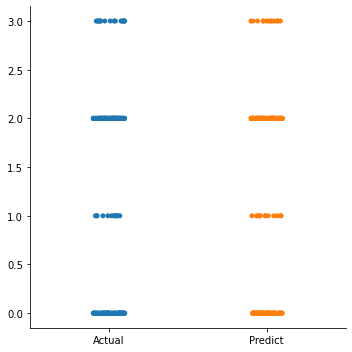

In [84]:
res=pd.DataFrame()
res['Actual']=y_test
res['Predict']=svc.predict(x_test)
print(res)
sns.catplot(data=res)

THANK YOU